#### Assignmet of consiladation

#### Import some libraries

In [154]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

ModuleNotFoundError: No module named 'plotly'

### Read CSV file of ImmoEliza

In [2]:
df = pd.read_csv('final_list_houses_dataset.csv', index_col='Unnamed: 0')

#### Show 5 row of data

In [3]:
df.head()

,Area [m²],Price [€],state of the building,number of facades,number of bedrooms,fully equipped kitchen,furnished,open fire,locality [zip code],surface of the land [m²],terrace,terrace surface [m²],swimming pool,type of property,subtype of property,garden,garden surface [m²]
0,123.0,200000,good,3.0,2.0,installed,no,NaN,3294,429.0,0,0,NaN,house,house,1,350
3,255.0,698000,just renovated,4.0,4.0,installed,no,NaN,2070,1210.0,0,0,NaN,house,villa,0,0
4,234.0,499000,as new,NaN,5.0,NaN,NaN,NaN,8800,744.0,0,0,NaN,house,villa,0,0
5,219.0,717000,as new,NaN,4.0,NaN,no,NaN,8000,760.0,0,0,NaN,house,house,0,0
6,156.0,429000,good,4.0,4.0,installed,no,NaN,8800,419.0,0,0,NaN,house,villa,1,90


### Information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10092 entries, 0 to 11382
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area [m²]                 8356 non-null   float64
 1   Price [€]                 10092 non-null  object 
 2   state of the building     6976 non-null   object 
 3   number of facades         7754 non-null   float64
 4   number of bedrooms        9940 non-null   float64
 5   fully equipped kitchen    6669 non-null   object 
 6   furnished                 7069 non-null   object 
 7   open fire                 746 non-null    float64
 8   locality [zip code]       10092 non-null  int64  
 9   surface of the land [m²]  10092 non-null  float64
 10  terrace                   10092 non-null  int64  
 11  terrace surface [m²]      10092 non-null  int64  
 12  swimming pool             400 non-null    object 
 13  type of property          10092 non-null  object 
 14  subtyp

### Derive statistics of our data

In [5]:
df.describe()

,Area [m²],number of facades,number of bedrooms,open fire,locality [zip code],surface of the land [m²],terrace,terrace surface [m²],garden,garden surface [m²]
count,8356.000000,7754.000000,9940.000000,746.000000,10092.000000,10092.000000,10092.000000,10092.000000,10092.000000,1.009200e+04
mean,234.451292,2.970338,3.650704,1.144772,5729.846116,1487.438466,0.291815,12.023781,0.297463,5.077414e+02
std,214.608229,0.860529,1.769129,0.714532,3027.551629,14781.508497,0.454620,202.691747,0.457165,1.506192e+04
min,30.000000,1.000000,1.000000,1.000000,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,140.000000,2.000000,3.000000,1.000000,2845.000000,197.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,180.000000,3.000000,3.000000,1.000000,6183.000000,370.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,259.000000,4.000000,4.000000,1.000000,8700.000000,813.000000,1.000000,12.000000,1.000000,6.000000e+01
max,10500.000000,16.000000,50.000000,10.000000,9992.000000,907540.000000,1.000000,20194.000000,1.000000,1.134500e+06


### Delete missing values in Area

In [6]:
df = df.dropna(subset=['Area [m²]'])

### Change Variable name 

In [7]:
df.columns = ['Area','Price','State_of_building','Facades','Bedrooms','Kitchen',
              'Furnished','Open_fire','Zip_code','Land_surface', 'Terrace',
              'Terrace_surface', 'Swimming_pool', 'Type_property','Subtype_property',
              'Garden', 'Garden_surface']

### Make a function to convert perfect calssification of variable 

In [8]:
def change_state_building(x):
    if x =='as new':
        return 'As new'
    elif x == 'just renovated':
        return 'Just renovated'
    elif x == 'good':
        return 'Good'
    elif x in ['to renovate','to be done up','to restore']:
        return 'To be done up'
    else:
        return x

In [9]:
df['State_of_building'] = df['State_of_building'].apply(lambda x: change_state_building(x))

In [10]:
def change_kitchen_type(x):
    if x in ['hyper equipped','usa hyper equipped']:
        return 'Hyper equipped'
    elif x in ['semi equipped','usa semi equipped']:
        return 'Semi equipped'
    elif x in ['installed','usa installed']:
        return 'Installed'
    elif x in ['not installed','usa uninstalled']:
        return 'Not installed'

In [11]:
df['Kitchen'] = df['Kitchen'].apply(lambda x: change_kitchen_type(x))

In [12]:
def change_furnished(x):
    if x == 'yes':
        return 'Yes'
    else:
        return 'No'

In [13]:
df['Furnished'] = df['Furnished'].apply(lambda x: change_furnished(x))

In [14]:
def change_open_fire(x):
    if math.isnan(x):
        return 'No'
    else:
        return 'Yes'

In [15]:
df['Open_fire'] = df['Open_fire'].apply(lambda x: change_open_fire(x))

In [16]:
def change_swimming_pool(x):
    if x is True:
        return "Yes"
    else:
        return "No"

In [17]:
df['Swimming_pool'] = df['Swimming_pool'].apply(lambda x: change_swimming_pool(x))

In [18]:
def yes_no(x):
    if x == 1:
        return 'Yes'
    elif x == 0:
        return 'No'

In [19]:
df['Terrace'] = df['Terrace'].apply(lambda x: yes_no(x))

In [20]:
df['Garden'] = df['Garden'].apply(lambda x: yes_no(x))

In [21]:
def zip_to_province(x):
    flanders = "Flanders"
    wallonia = "Wallonia"
    if x in range(1000,1300):
        return "Brussels"
    elif x in range(1300,1500):
        return wallonia
    elif x in range(1500,4000):
        return flanders
    elif x in range(4000,8000):
        return wallonia
    elif x in range(8000,10000):
        return flanders


df["Regions"] = df["Zip_code"].apply(lambda x: zip_to_province(x))

In [22]:
price_no = df[df['Price'] == 'no'].index
df.drop(price_no , inplace=True)

In [23]:
def to_int(x):
    return int(x)

In [24]:
df['Price'] = df['Price'].apply(lambda x: to_int(x))

#### To check there are still any None values or not?

In [25]:
df.isnull().sum()

Area                    0
Price                   0
State_of_building    2138
Facades              1684
Bedrooms               64
Kitchen              2412
Furnished               0
Open_fire               0
Zip_code                0
Land_surface            0
Terrace                 0
Terrace_surface         0
Swimming_pool           0
Type_property           0
Subtype_property        0
Garden                  0
Garden_surface          0
Regions                 0
dtype: int64

### Round price per square meter

In [26]:
df['Price_per_square_meter'] = round((df['Price']/df['Area']), 2)

In [27]:
df = df.drop_duplicates(["Area", "Price", "State_of_building", "Zip_code","Land_surface", "Garden_surface"])
print(df.shape)

(7895, 19)


C:\Users\Sadhana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Freqency')

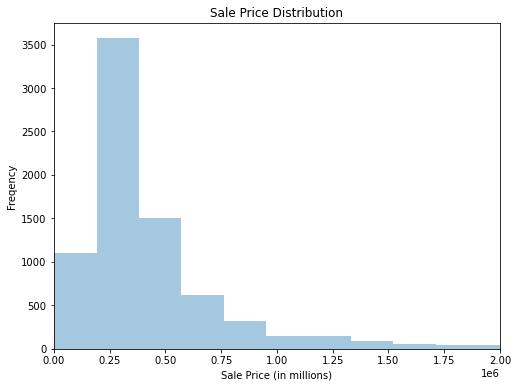

In [28]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['Price'],kde=False,ax=ax)
plt.xlim(0, 2000000)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price (in millions)')
plt.ylabel('Freqency')

(0.0, 2000000.0)

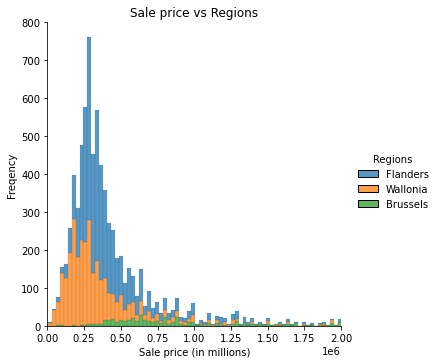

In [29]:
d = sns.displot(data=df, x="Price", hue="Regions", multiple="stack")
plt.title('Sale price vs Regions')
plt.xlabel('Sale price (in millions)')
plt.ylabel('Freqency')
plt.xlim(0, 2000000)

(0.0, 2000000.0)

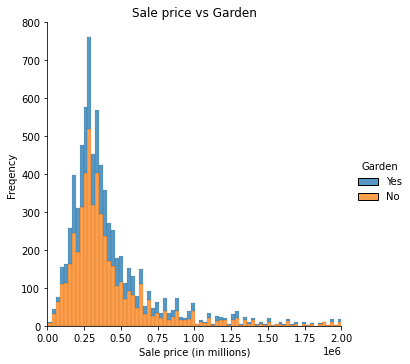

In [30]:
d = sns.displot(data=df, x="Price", hue="Garden", multiple="stack")
plt.title('Sale price vs Garden')
plt.xlabel('Sale price (in millions)')
plt.ylabel('Freqency')
plt.xlim(0, 2000000)

(0.0, 1000000.0)

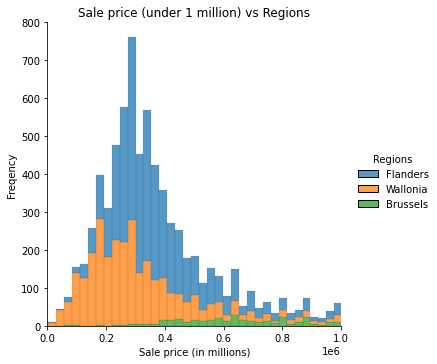

In [31]:
sns.displot(data=df, x="Price", hue="Regions", multiple="stack")
plt.title('Sale price (under 1 million) vs Regions')
plt.xlabel('Sale price (in millions)')
plt.ylabel('Freqency')
plt.xlim(0, 1000000)

(0.0, 1000000.0)

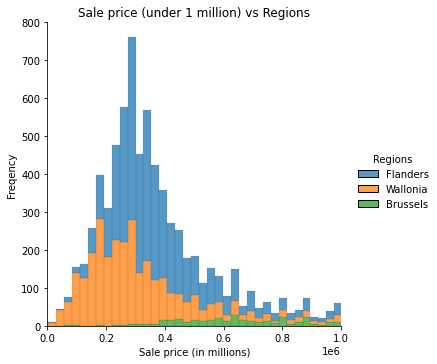

In [32]:
sns.displot(data=df, x="Price", hue="Regions", multiple="stack")
plt.title('Sale price (under 1 million) vs Regions')
plt.xlabel('Sale price (in millions)')
plt.ylabel('Freqency')
plt.xlim(0, 1000000)

(0.0, 5000.0)

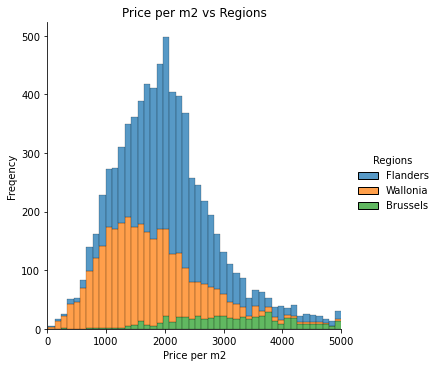

In [33]:
sns.displot(data=df, x='Price_per_square_meter', hue="Regions", multiple="stack")
plt.title('Price per m2 vs Regions')
plt.xlabel('Price per m2')
plt.ylabel('Freqency')
plt.xlim(0, 5000)

(0.0, 700.0)

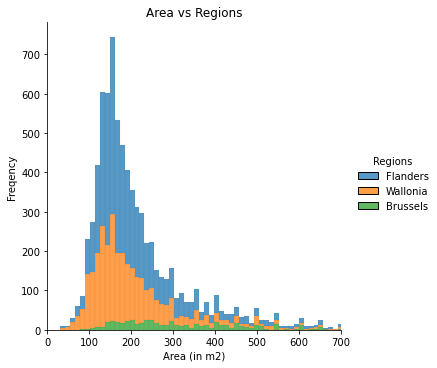

In [34]:
sns.displot(data=df, x='Area', hue="Regions", multiple="stack")
plt.title('Area vs Regions')
plt.xlabel('Area (in m2)')
plt.ylabel('Freqency')
plt.xlim(0, 700)

Text(0, 0.5, 'Freqency')

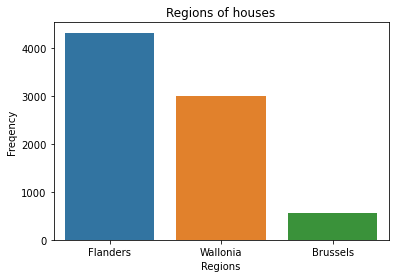

In [35]:
sns.countplot(data=df, x="Regions")
plt.title('Regions of houses')
plt.ylabel('Freqency')

<AxesSubplot:xlabel='Subtype_property', ylabel='Price_per_square_meter'>

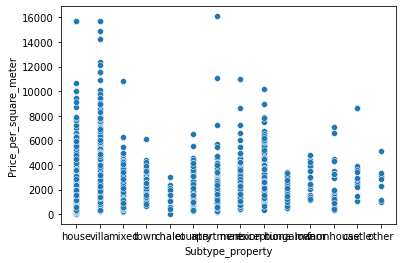

In [36]:
sns.scatterplot(x="Subtype_property", y="Price_per_square_meter", data=df)

In [37]:
print('Some statistics of the house price:')
print(df['Price'].describe())
print()
print('House price median')
print(df['Price'].median())

Some statistics of the house price:
count    7.895000e+03
mean     5.185848e+05
std      6.295553e+05
min      2.500000e+03
25%      2.490000e+05
50%      3.400000e+05
75%      5.190000e+05
max      9.500000e+06
Name: Price, dtype: float64

House price median
340000.0


(0.0, 5000.0)

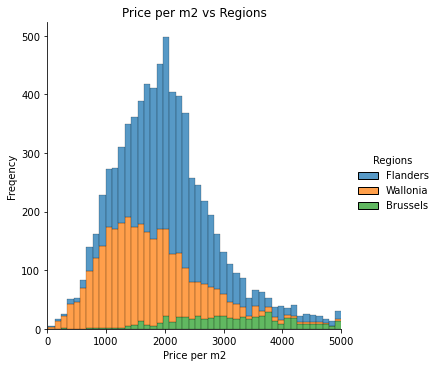

In [38]:
sns.displot(data=df, x='Price_per_square_meter', hue="Regions", multiple="stack")
plt.title('Price per m2 vs Regions')
plt.xlabel('Price per m2')
plt.ylabel('Freqency')
plt.xlim(0, 5000)

In [39]:
corr=df.corr()["Price"]
corr[np.argsort(corr, axis=0)[::-1]]

Price                     1.000000
Price_per_square_meter    0.685466
Area                      0.533688
Bedrooms                  0.426930
Facades                   0.245187
Land_surface              0.226502
Garden_surface            0.049459
Terrace_surface           0.021381
Zip_code                 -0.256163
Name: Price, dtype: float64

Text(0, 0.5, 'Freqency')

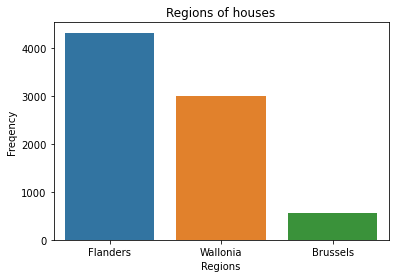

In [40]:
sns.countplot(data=df, x="Regions")
plt.title('Regions of houses')
plt.ylabel('Freqency')

(0.0, 2000000.0)

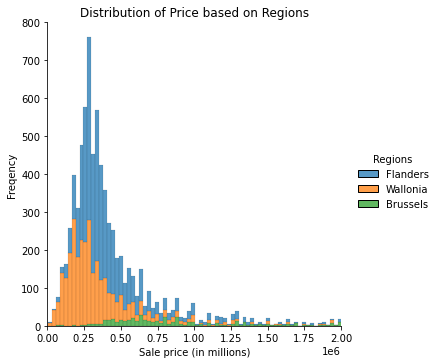

In [41]:
d = sns.displot(data=df, x="Price", hue="Regions", multiple="stack")
plt.title('Distribution of Price based on Regions')
plt.xlabel('Sale price (in millions)')
plt.ylabel('Freqency')
plt.xlim(0, 2000000)

(0.0, 1000000.0)

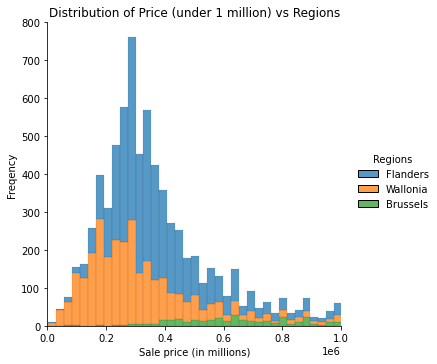

In [42]:
sns.displot(data=df, x="Price", hue="Regions", multiple="stack")
plt.title('Distribution of Price (under 1 million) vs Regions')
plt.xlabel('Sale price (in millions)')
plt.ylabel('Freqency')
plt.xlim(0, 1000000)

(0.0, 5000.0)

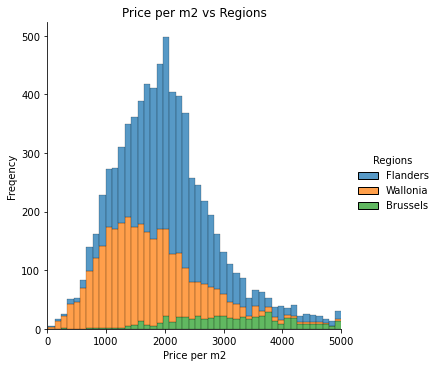

In [43]:
sns.displot(data=df, x='Price_per_square_meter', hue="Regions", multiple="stack")
plt.title('Price per m2 vs Regions')
plt.xlabel('Price per m2')
plt.ylabel('Freqency')
plt.xlim(0, 5000)

(0.0, 700.0)

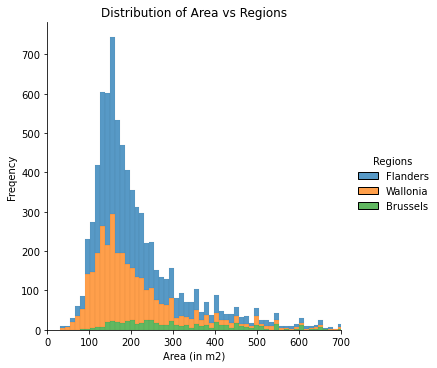

In [44]:
sns.displot(data=df, x='Area', hue="Regions", multiple="stack")
plt.title('Distribution of Area vs Regions')
plt.xlabel('Area (in m2)')
plt.ylabel('Freqency')
plt.xlim(0, 700)

Text(0.5, 1.0, 'Numeric Feature heatmap')

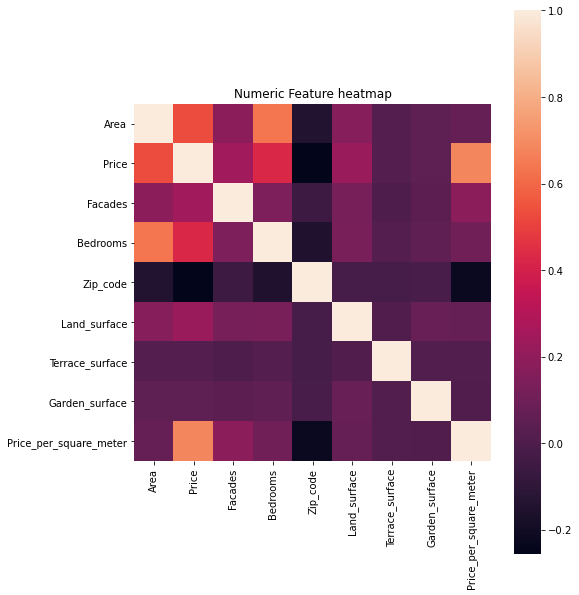

In [45]:
fig,ax = plt.subplots(figsize=(8,10))
correlation = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')

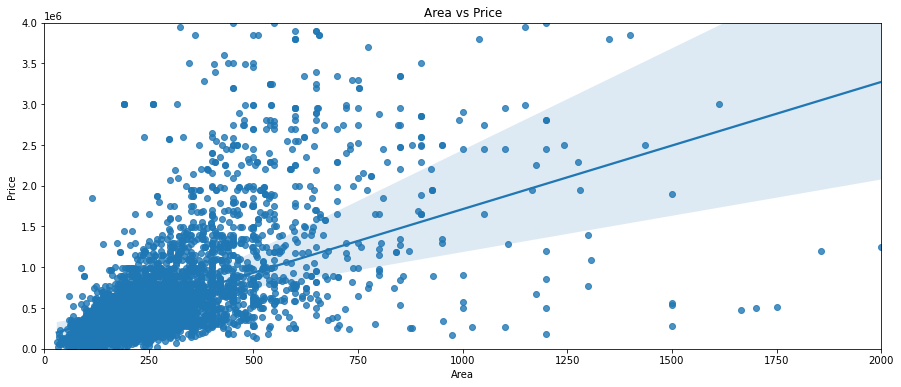

In [48]:
fig,ax = plt.subplots(figsize=(15,6))
sns.regplot(x = 'Area', y='Price' , data=df,ax=ax)
plt.ylim(0, 4000000)
plt.xlim(0, 2000)
plt.title('Area vs Price') 
plt.show()

(0.0, 5000.0)

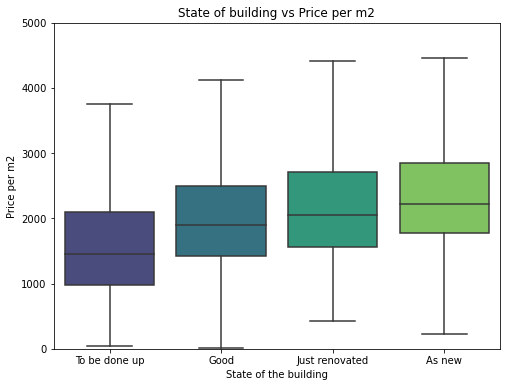

In [51]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'State_of_building', y = 'Price_per_square_meter',  data = df,ax=ax, order=["To be done up", "Good", "Just renovated", "As new"], palette= "viridis", showfliers = False)
plt.title('State of building vs Price per m2')
plt.xlabel('State of the building')
plt.ylabel('Price per m2')
#ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.ylim(0, 5000)

(0.0, 1500000.0)

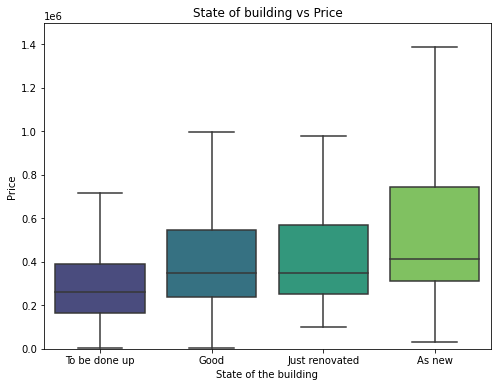

In [52]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'State_of_building', y = 'Price',  data = df,ax=ax, order=["To be done up", "Good", "Just renovated", "As new"], palette= "viridis", showfliers = False)
plt.title('State of building vs Price')
plt.xlabel('State of the building')
plt.ylabel('Price')
#ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.ylim(0, 1500000)

(0.0, 7000.0)

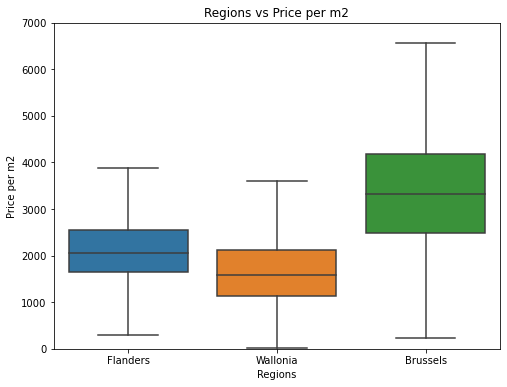

In [53]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Price_per_square_meter',  data = df,ax=ax, showfliers = False)
plt.title('Regions vs Price per m2')
plt.xlabel('Regions')
plt.ylabel('Price per m2')
plt.ylim(0, 7000)

Text(0, 0.5, 'Price (in millions)')

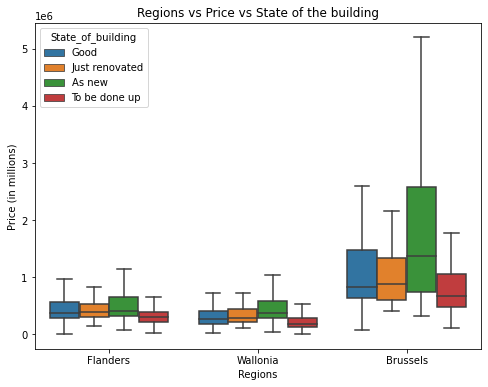

In [54]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Price',  data = df,ax=ax, hue='State_of_building',showfliers = False)
plt.title('Regions vs Price vs State of the building')
plt.xlabel('Regions')
plt.ylabel('Price (in millions)')
#plt.ylim(0, 3000000)

Text(0, 0.5, 'Price per m2')

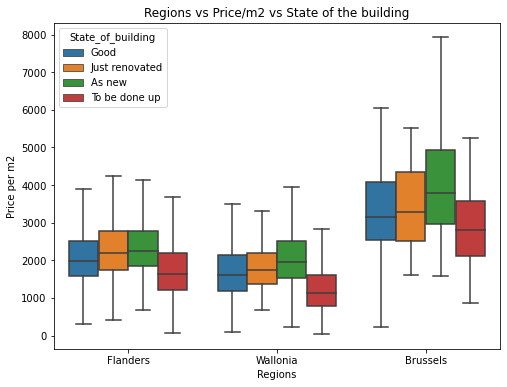

In [55]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Price_per_square_meter',  data = df,ax=ax, hue='State_of_building',showfliers = False)
plt.title('Regions vs Price/m2 vs State of the building')
plt.xlabel('Regions')
plt.ylabel('Price per m2')
#plt.ylim(0, 3000000)

Text(0, 0.5, 'Area (in m2)')

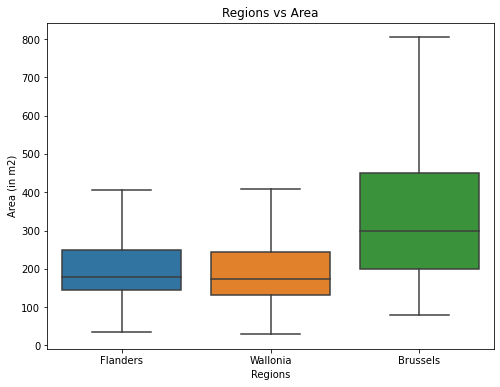

In [56]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Area',  data = df,ax=ax,showfliers = False)
plt.title('Regions vs Area')
plt.xlabel('Regions')
plt.ylabel('Area (in m2)')
#plt.ylim(0, 2800000)

Text(0, 0.5, 'Garden surface')

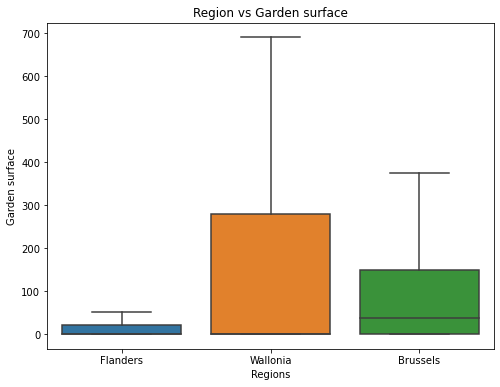

In [58]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Garden_surface',  data = df,ax=ax,showfliers = False)
plt.title('Region vs Garden surface')
plt.xlabel('Regions')
plt.ylabel('Garden surface')
#plt.ylim(0, 2800000)

(0.0, 1500000.0)

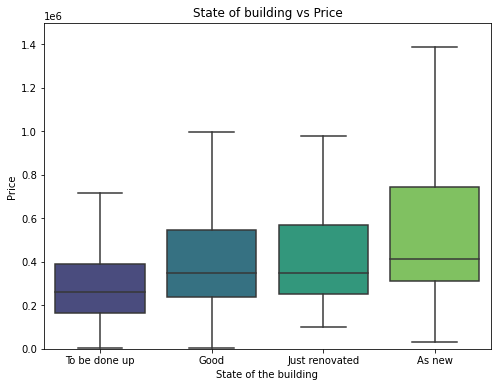

In [59]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'State_of_building', y = 'Price',  data = df,ax=ax, order=["To be done up", "Good", "Just renovated", "As new"], palette= "viridis", showfliers = False)
plt.title('State of building vs Price')
plt.xlabel('State of the building')
plt.ylabel('Price')
#ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.ylim(0, 1500000)

(0.0, 5000.0)

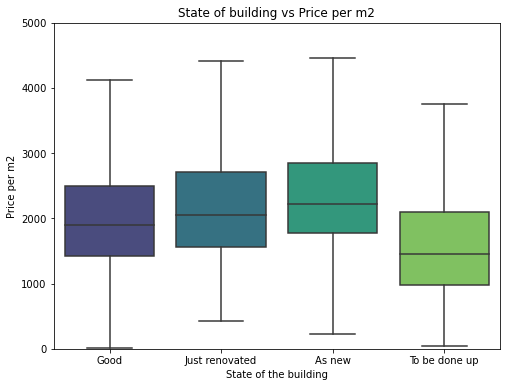

In [61]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'State_of_building', y = 'Price_per_square_meter',  data = df,ax=ax, palette= "viridis", showfliers = False)
plt.title('State of building vs Price per m2')
plt.xlabel('State of the building')
plt.ylabel('Price per m2')
#ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.ylim(0, 5000)

(0.0, 7000.0)

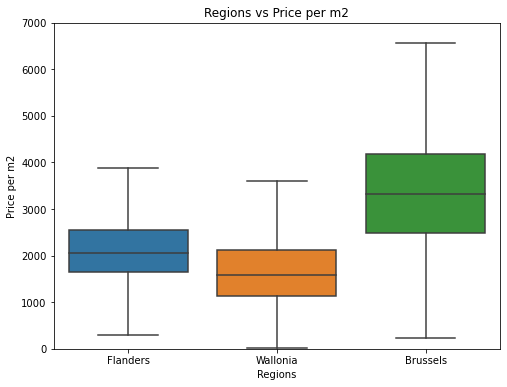

In [62]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Price_per_square_meter',  data = df,ax=ax, showfliers = False)
plt.title('Regions vs Price per m2')
plt.xlabel('Regions')
plt.ylabel('Price per m2')
plt.ylim(0, 7000)

(0.0, 2800000.0)

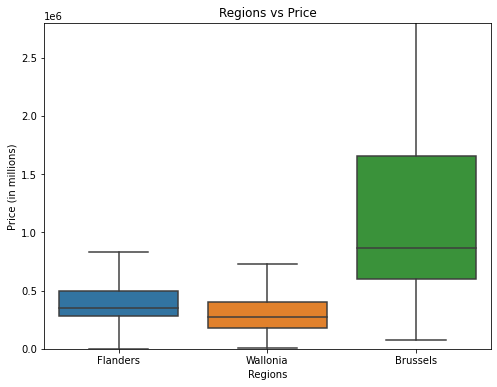

In [63]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Regions vs Price')
plt.xlabel('Regions')
plt.ylabel('Price (in millions)')
plt.ylim(0, 2800000)

Text(0.5, 1.0, 'Garden vs Price')

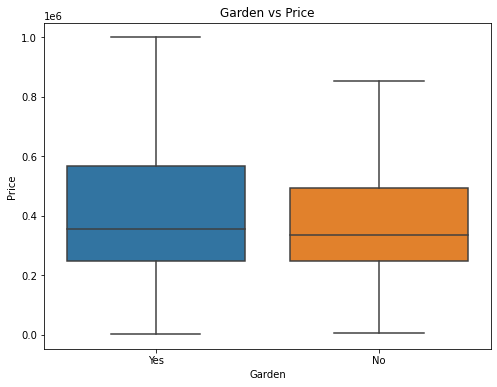

In [64]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Garden', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Garden vs Price')

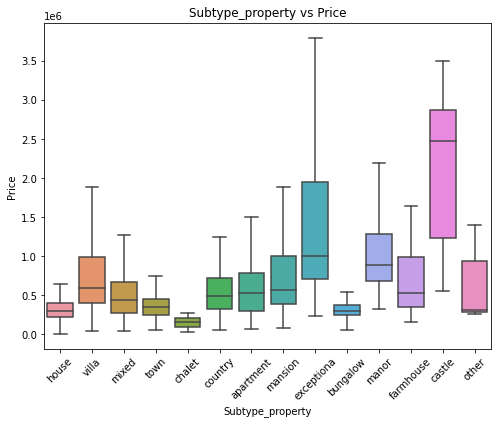

In [65]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Subtype_property', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Subtype_property vs Price')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)

Text(0.5, 1.0, 'Is having a swimming pool linked to a higher price?')

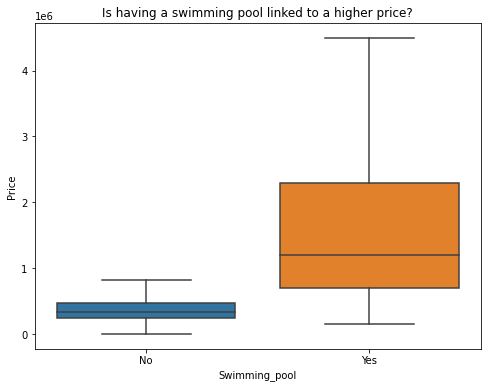

In [66]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Swimming_pool', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Is having a swimming pool linked to a higher price?')

Text(0.5, 1.0, 'Is fursnihed linked to a higher price?')

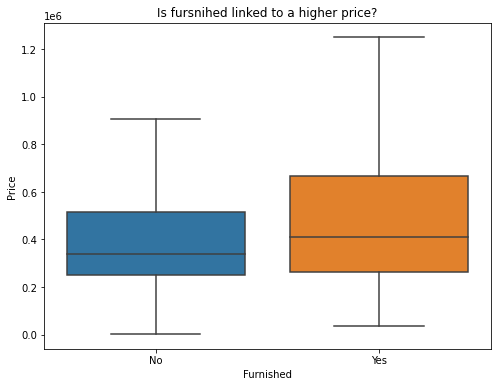

In [67]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Furnished', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Is fursnihed linked to a higher price?')

Text(0.5, 1.0, 'Is having an open-fire linked to a higher price?')

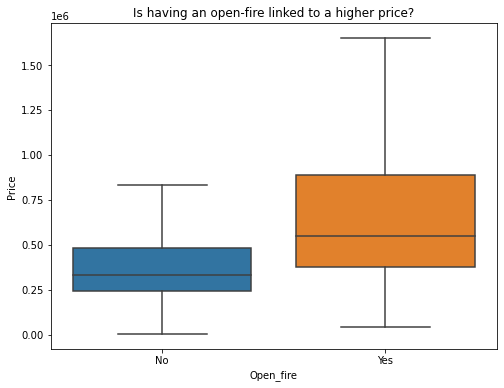

In [68]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Open_fire', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Is having an open-fire linked to a higher price?')

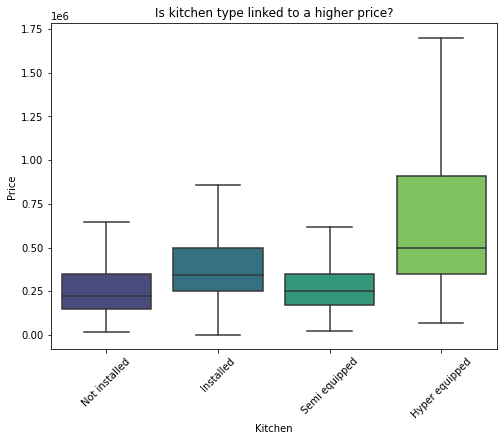

In [69]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Kitchen', y = 'Price',  data = df,ax=ax, order=["Not installed", "Installed", "Semi equipped", "Hyper equipped"], palette= "viridis", showfliers = False)
plt.title('Is kitchen type linked to a higher price?')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)

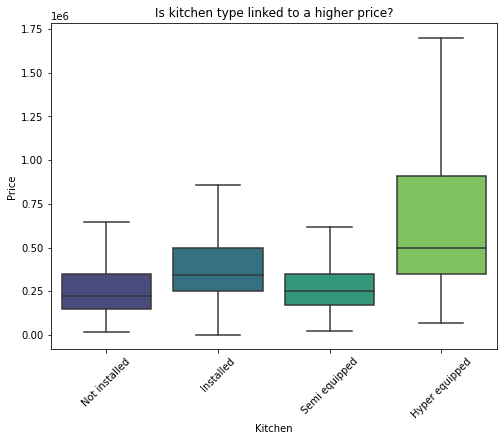

In [70]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Kitchen', y = 'Price',  data = df,ax=ax, order=["Not installed", "Installed", "Semi equipped", "Hyper equipped"], palette= "viridis", showfliers = False)
plt.title('Is kitchen type linked to a higher price?')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)

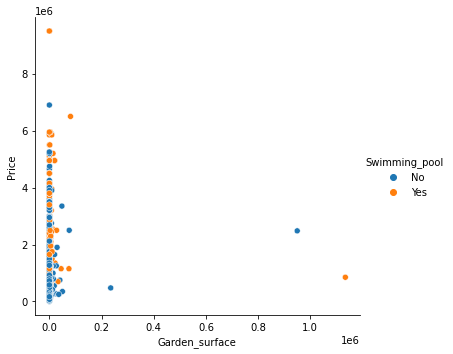

In [71]:
sns.relplot(x="Garden_surface", y="Price", data=df, hue='Swimming_pool')
plt.show()

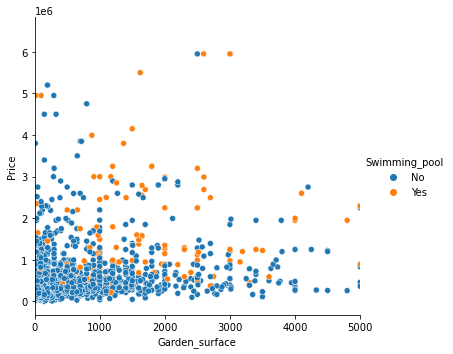

In [72]:
df_garden = df[df['Garden_surface'] > 1]
sns.relplot(x="Garden_surface", y="Price", data=df_garden, hue='Swimming_pool')
plt.xlim(0, 5000)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Area'),
  Text(1, 0, 'Price'),
  Text(2, 0, 'Facades'),
  Text(3, 0, 'Bedrooms'),
  Text(4, 0, 'Zip_code'),
  Text(5, 0, 'Land_surface'),
  Text(6, 0, 'Terrace_surface'),
  Text(7, 0, 'Garden_surface'),
  Text(8, 0, 'Price_per_square_meter')])

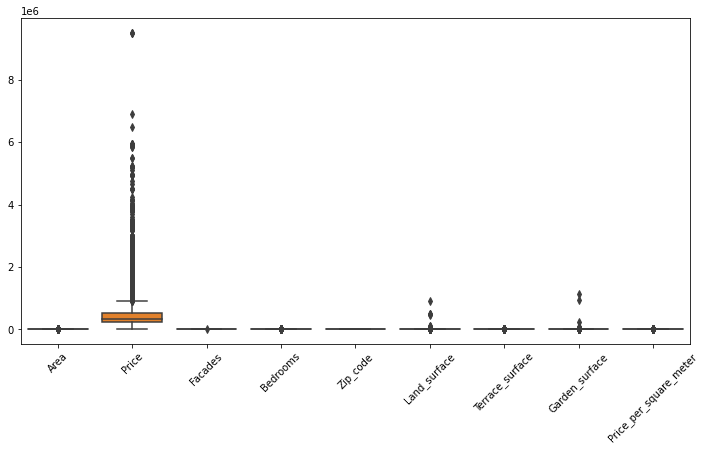

In [73]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot
sns.boxplot(data=df)
plt.xticks(rotation=45)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

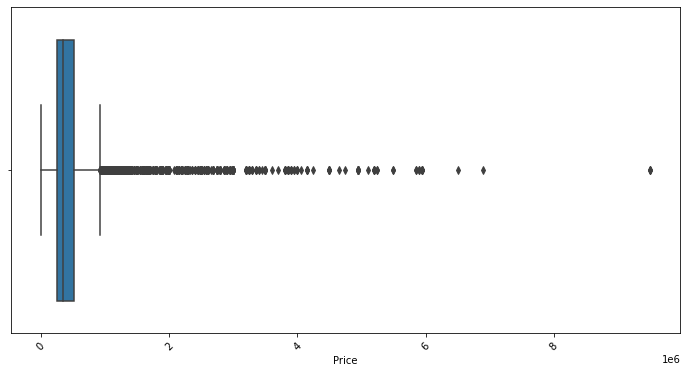

In [74]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for price only
sns.boxplot(x=df['Price'])
plt.xticks(rotation=45)

In [75]:
df.Price.describe()

count    7.895000e+03
mean     5.185848e+05
std      6.295553e+05
min      2.500000e+03
25%      2.490000e+05
50%      3.400000e+05
75%      5.190000e+05
max      9.500000e+06
Name: Price, dtype: float64

In [78]:
outliers_of_price = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_price.append(observation)
    return outliers_of_price

outlier_of_price = detect_outlier(df.Price)
print(outlier_of_price)

[5100000, 2450000, 2950000, 2750000, 2999000, 4950000, 4500000, 2550000, 3200000, 2800000, 2600000, 2890000, 5250000, 2750000, 2495000, 2500000, 2550000, 2985000, 3200000, 2950000, 5900000, 3850000, 4950000, 3450000, 2550000, 2650000, 2999999, 2690000, 2850000, 2450000, 2450000, 3600000, 2999000, 3950000, 2450000, 9500000, 2750000, 2600000, 2550000, 3850000, 2450000, 2495000, 3500000, 4150000, 2950000, 3000000, 5200000, 5200000, 3350000, 3200000, 3995000, 2600000, 3850000, 2999000, 3250000, 2990000, 3800000, 5850000, 3250000, 3000000, 2900000, 4650000, 4950000, 2495000, 2750000, 2495000, 2490000, 2690000, 2750000, 2600000, 2750000, 2575000, 2500000, 2999000, 2685000, 2600000, 3350000, 2875000, 2990000, 2450000, 3700000, 2750000, 3495000, 9500000, 3800000, 2990000, 3350000, 4950000, 2750000, 5950000, 4050000, 4950000, 3900000, 3850000, 2990000, 2490000, 2690000, 4250000, 2950000, 2950000, 3800000, 2800000, 3000000, 4750000, 3350000, 3200000, 3250000, 2750000, 4500000, 3000000, 4950000, 

In [79]:
print(np.where(df['Price'] > 3000000))

(array([  35,  203,  234,  300,  460,  859,  921,  969, 1112, 1116, 1509,
       1683, 1703, 1874, 2088, 2104, 2303, 2324, 2325, 2394, 2414, 2550,
       2564, 2703, 2728, 2860, 2920, 2939, 3856, 3938, 3955, 3960, 4036,
       4117, 4157, 4208, 4256, 4272, 4281, 4340, 4505, 4540, 4578, 4579,
       4631, 4632, 4683, 4722, 4797, 4977, 5014, 5038, 5110, 5122, 5131,
       5189, 5204, 5374, 5431, 5444, 5594, 5620, 5642, 5799, 6017, 6036,
       6093, 6107, 6132, 6415, 6473, 6476, 6504, 6680, 6695, 6718, 6721,
       6934, 6957, 7084, 7105, 7152, 7217, 7224, 7322, 7392, 7423, 7445,
       7451, 7570, 7659, 7702, 7770, 7771], dtype=int64),)


In [80]:
delete_row = [  35,  203,  234,  300,  460,  859,  921,  969, 1112, 1116, 1509,
       1683, 1703, 1874, 2088, 2104, 2303, 2324, 2325, 2394, 2414, 2550,
       2564, 2703, 2728, 2860, 2920, 2939, 3856, 3938, 3955, 3960, 4036,
       4117, 4157, 4208, 4256, 4272, 4281, 4340, 4505, 4540, 4578, 4579,
       4631, 4632, 4683, 4722, 4797, 4977, 5014, 5038, 5110, 5122, 5131,
       5189, 5204, 5374, 5431, 5444, 5594, 5620, 5642, 5799, 6017, 6036,
       6093, 6107, 6132, 6415, 6473, 6476, 6504, 6680, 6695, 6718, 6721,
       6934, 6957, 7084, 7105, 7152, 7217, 7224, 7322, 7392, 7423, 7445,
       7451, 7570, 7659, 7702, 7770, 7771]

df = df.drop(df.index[delete_row])

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

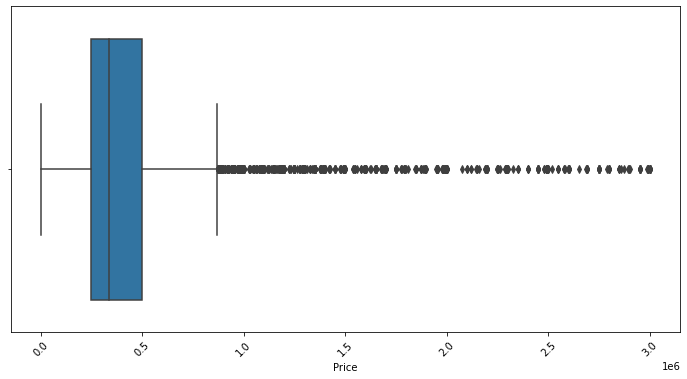

In [81]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for price only
sns.boxplot(x=df['Price'])
plt.xticks(rotation=45)

In [82]:
outliers_of_price = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_price.append(observation)
    return outliers_of_price

outlier_of_price = detect_outlier(df.Price)
print(outlier_of_price)

[1850000, 1950000, 2450000, 2950000, 1875000, 2750000, 2999000, 2550000, 2000000, 1895000, 2800000, 2600000, 2890000, 2200000, 1895000, 2750000, 2295000, 2350000, 2495000, 2295000, 2500000, 2550000, 2250000, 2190000, 2985000, 2950000, 2295000, 1850000, 2350000, 1890000, 1850000, 2190000, 2290000, 2550000, 1999000, 1850000, 2650000, 2999999, 2400000, 2690000, 2285000, 2150000, 2850000, 2450000, 2450000, 1950000, 2075000, 2100000, 2999000, 2250000, 2450000, 2750000, 2600000, 2550000, 2260000, 1980000, 2450000, 2495000, 1955000, 2295000, 2150000, 1900000, 2950000, 1995000, 3000000, 2145000, 2200000, 2600000, 2249000, 2200000, 2999000, 2195000, 1950000, 1850000, 2990000, 1990000, 1975000, 2120000, 2325000, 1950000, 1895000, 1790000, 1950000, 3000000, 2900000, 1950000, 2495000, 1945000, 2750000, 2300000, 2495000, 2490000, 2690000, 2750000, 2600000, 1845000, 1950000, 2750000, 2150000, 2575000, 1999000, 2500000, 2999000, 1850000, 1950000, 1875000, 2290000, 2250000, 2200000, 1990000, 2685000, 

In [83]:
z = np.abs(stats.zscore(df.Price))
print(z)

[0.61846916 0.51720149 0.06338932 ... 0.90352705 0.69774034 0.24810684]


In [84]:
print(np.where(z > 3))

(array([  29,   37,   54,   92,  171,  198,  200,  264,  275,  321,  331,
        341,  346,  366,  451,  479,  480,  496,  593,  630,  665,  738,
        765,  814,  845,  878,  919,  944,  964,  971, 1006, 1033, 1073,
       1122, 1173, 1246, 1283, 1317, 1321, 1328, 1381, 1387, 1410, 1433,
       1455, 1488, 1576, 1618, 1639, 1657, 1685, 1704, 1744, 1745, 1908,
       1912, 1923, 1931, 1989, 2140, 2149, 2150, 2176, 2200, 2243, 2303,
       2332, 2476, 2505, 2531, 2538, 2587, 2600, 2617, 2633, 2642, 2717,
       2760, 2773, 2781, 2796, 2822, 2833, 2863, 2890, 2902, 3038, 3084,
       3172, 3173, 3198, 3203, 3237, 3247, 3284, 3325, 3349, 3364, 3382,
       3416, 3480, 3482, 3490, 3523, 3551, 3565, 3575, 3576, 3626, 3669,
       3681, 3686, 3689, 3728, 3766, 3837, 3859, 3862, 3915, 3970, 4047,
       4049, 4050, 4144, 4172, 4188, 4214, 4243, 4315, 4330, 4387, 4412,
       4457, 4465, 4493, 4523, 4532, 4550, 4604, 4621, 4660, 4674, 4713,
       4721, 4809, 4811, 4815, 4863, 4867, 4885, 4

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

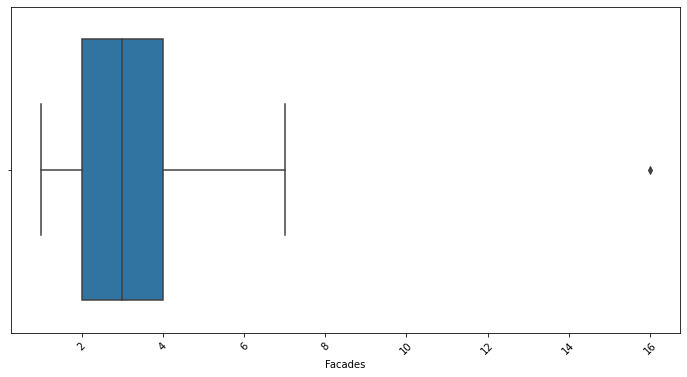

In [85]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for facades only
sns.boxplot(x=df['Facades'])
plt.xticks(rotation=45)

In [86]:
df['Facades'].describe()

count    6256.000000
mean        2.965793
std         0.855572
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Facades, dtype: float64

In [87]:
# finding the 1st quartile
# q1 = np.quantile(df['Facades'], 0.25)
q1 = df['Facades'].quantile(0.25)
 
# finding the 3rd quartile
# q3 = np.quantile(df['Facades'], 0.75)
q3 = df['Facades'].quantile(0.75)
med = np.median(df['Facades'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

2.0 7.0 -1.0


In [88]:
outliers_of_facades = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_facades.append(observation)
    return outliers_of_facades

outlier_of_facades = detect_outlier(df.Facades)
print(outlier_of_facades)

[16.0, 6.0, 6.0, 7.0, 6.0]


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

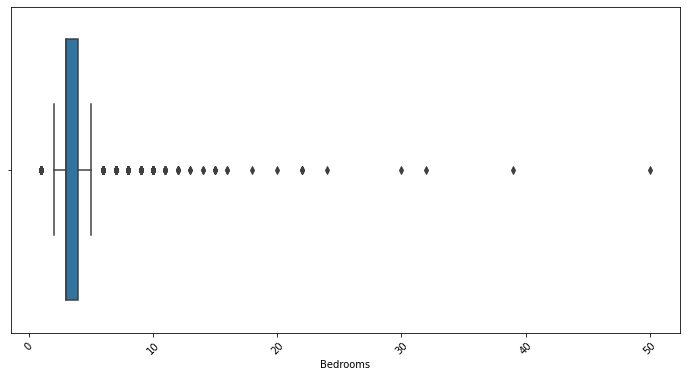

In [89]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for bedrooms only
sns.boxplot(x=df['Bedrooms'])
plt.xticks(rotation=45)

In [90]:
df['Bedrooms'].describe()

count    7746.000000
mean        3.671572
std         1.695187
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        50.000000
Name: Bedrooms, dtype: float64

In [91]:
outliers_of_bedrooms = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_bedrooms.append(observation)
    return outliers_of_bedrooms

outlier_of_bedrooms = detect_outlier(df.Bedrooms)
print(outlier_of_bedrooms)

[9.0, 10.0, 10.0, 10.0, 10.0, 9.0, 12.0, 10.0, 10.0, 10.0, 9.0, 18.0, 10.0, 14.0, 10.0, 16.0, 12.0, 30.0, 13.0, 10.0, 10.0, 10.0, 16.0, 11.0, 20.0, 50.0, 10.0, 10.0, 9.0, 11.0, 11.0, 11.0, 10.0, 9.0, 9.0, 10.0, 10.0, 14.0, 11.0, 15.0, 9.0, 9.0, 10.0, 9.0, 15.0, 9.0, 11.0, 9.0, 10.0, 13.0, 11.0, 12.0, 9.0, 11.0, 15.0, 10.0, 10.0, 9.0, 10.0, 9.0, 10.0, 9.0, 9.0, 10.0, 24.0, 9.0, 22.0, 10.0, 22.0, 9.0, 9.0, 12.0, 9.0, 22.0, 11.0, 15.0, 9.0, 9.0, 10.0, 10.0, 9.0, 9.0, 10.0, 10.0, 11.0, 9.0, 9.0, 11.0, 9.0, 10.0, 12.0, 11.0, 9.0, 10.0, 9.0, 12.0, 9.0, 39.0, 10.0, 11.0, 10.0, 32.0, 9.0, 10.0]


In [92]:
number_of_outlier_of_bedrooms = len(outlier_of_bedrooms)
print(number_of_outlier_of_bedrooms)

104


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

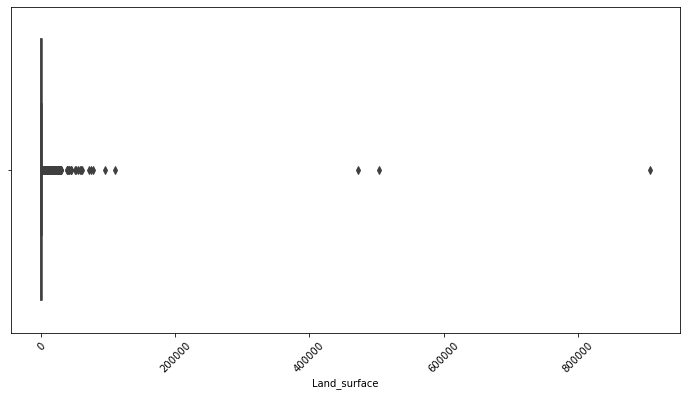

In [93]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for Land_surface only
sns.boxplot(x=df['Land_surface'])
plt.xticks(rotation=45)

In [94]:
df['Land_surface'].describe()

count      7801.000000
mean       1360.465325
std       13430.721793
min           1.000000
25%         193.000000
50%         380.000000
75%         842.000000
max      907540.000000
Name: Land_surface, dtype: float64

In [95]:
outliers_of_land_surface = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_land_surface.append(observation)
    return outliers_of_land_surface

outlier_of_land_surface = detect_outlier(df.Land_surface)
print(outlier_of_land_surface)

[60197.0, 45000.0, 52037.0, 503500.0, 42141.0, 71907.0, 60000.0, 110000.0, 57494.0, 907540.0, 77237.0, 44827.0, 472724.0, 44918.0, 95000.0, 49800.0, 75000.0, 45000.0, 54752.0]


In [96]:
outlier_of_land_surface_count = len(outlier_of_land_surface)
print(outlier_of_land_surface_count)

19


(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000., 22500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

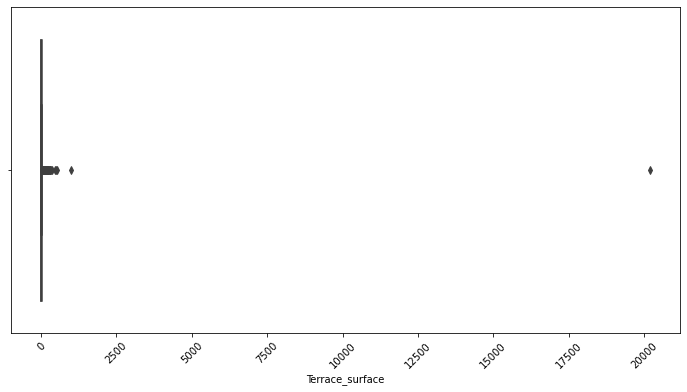

In [97]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for Terrace_surface only
sns.boxplot(x=df['Terrace_surface'])
plt.xticks(rotation=45)

In [98]:
df['Terrace_surface'].describe()

count     7801.000000
mean        14.066402
std        230.233928
min          0.000000
25%          0.000000
50%          0.000000
75%         15.000000
max      20194.000000
Name: Terrace_surface, dtype: float64

In [99]:
outliers_of_terrace_surface = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_terrace_surface.append(observation)
    return outliers_of_terrace_surface

outlier_of_terrace_surface = detect_outlier(df.Terrace_surface)
print(outlier_of_terrace_surface)

[1000, 20194]


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

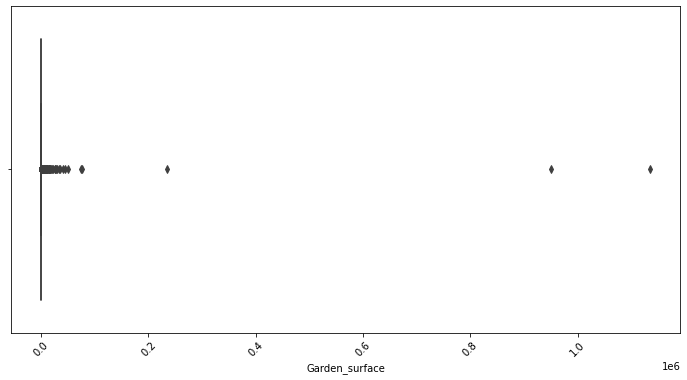

In [100]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for Garden_surface only
sns.boxplot(x=df['Garden_surface'])
plt.xticks(rotation=45)

In [101]:
df['Garden_surface'].describe()

count    7.801000e+03
mean     5.926766e+02
std      1.706773e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+02
max      1.134500e+06
Name: Garden_surface, dtype: float64

In [102]:
outliers_of_garden_surface = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_garden_surface.append(observation)
    return outliers_of_garden_surface

outlier_of_garden_surface = detect_outlier(df.Garden_surface)
print(outlier_of_garden_surface)

[1134500, 75000, 76020, 235000, 950002]


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000., 18000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

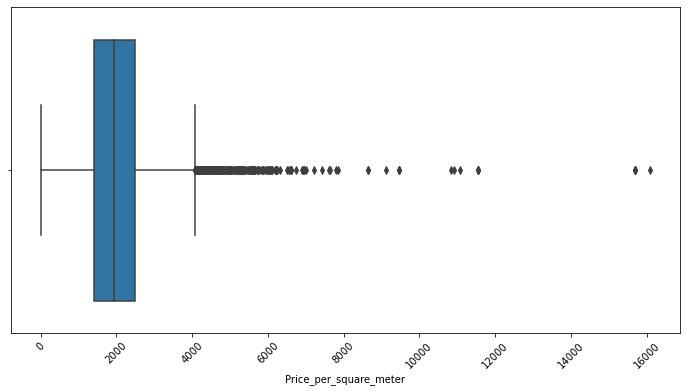

In [103]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for price per square meter only
sns.boxplot(x=df['Price_per_square_meter'])
plt.xticks(rotation=45)

In [104]:
df['Price_per_square_meter'].describe()

count     7801.000000
mean      2075.943951
std       1070.603940
min         15.050000
25%       1422.760000
50%       1945.310000
75%       2482.140000
max      16086.960000
Name: Price_per_square_meter, dtype: float64

In [105]:
outliers_of_price_per_square_meter = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_price_per_square_meter.append(observation)
    return outliers_of_price_per_square_meter

outlier_of_price_per_square_meter = detect_outlier(df.Price_per_square_meter)
print(outlier_of_price_per_square_meter)

[6208.33, 5571.43, 5357.14, 6111.11, 15701.57, 5882.35, 5714.29, 6500.0, 6215.05, 5319.44, 7442.53, 5625.0, 5625.0, 5598.77, 5325.93, 6219.51, 6218.75, 6611.11, 16086.96, 7019.23, 5882.35, 5320.86, 6625.0, 5380.0, 5594.06, 5632.18, 9457.45, 6916.67, 6562.5, 15701.57, 6046.51, 5916.67, 5544.44, 7603.69, 11538.46, 9457.45, 6025.28, 6075.0, 5655.53, 9460.57, 5613.81, 11538.46, 6184.21, 6250.0, 5423.91, 5417.83, 6123.6, 11078.65, 5750.0, 7222.22, 5375.0, 6250.0, 8640.94, 15701.57, 6611.11, 6944.44, 5571.43, 5645.16, 5980.0, 5493.27, 5595.24, 5516.61, 10833.33, 5516.61, 5333.33, 5300.0, 11538.46, 5789.47, 11538.46, 5472.44, 5344.83, 5290.1, 5733.94, 5753.14, 5655.53, 5555.56, 10903.36, 6311.69, 9113.48, 5733.33, 8640.94, 6904.76, 7631.58, 5423.91, 6551.09, 5380.0, 5997.5, 5300.0, 6743.24, 5857.74, 5833.33, 7794.12, 15701.57, 6600.0, 5980.0, 6075.0, 6944.44, 5870.59, 5544.44, 5997.5, 7854.98, 5866.67, 5990.78]


In [106]:
number_of_outlier_of_price_per_square_meter = len(outlier_of_price_per_square_meter)
print(number_of_outlier_of_price_per_square_meter)

103


<AxesSubplot:>

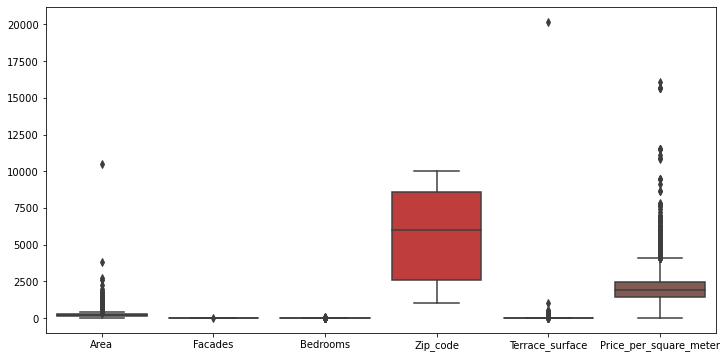

In [107]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

stats_df = df.drop(['Price', 'Land_surface','Garden_surface'], axis=1)
sns.boxplot(data=stats_df)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Installed'),
  Text(1, 0, 'Hyper equipped'),
  Text(2, 0, 'Semi equipped'),
  Text(3, 0, 'Not installed')])

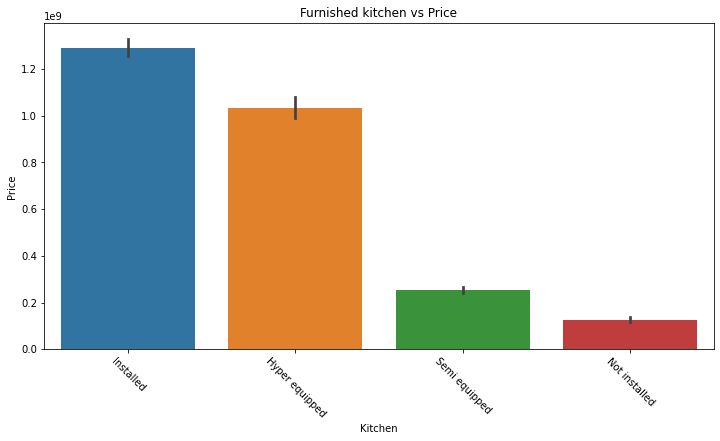

In [108]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Kitchen', y='Price', data=df, estimator=sum)
plt.title('Furnished kitchen vs Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(0.0, 2000000.0)

<Figure size 864x432 with 0 Axes>

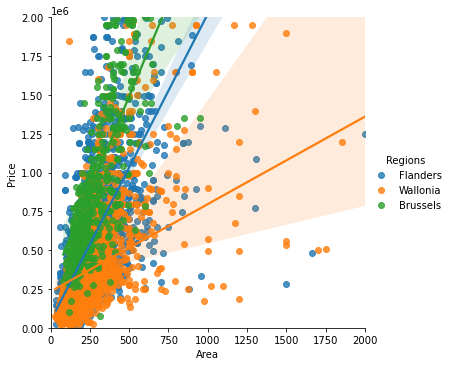

In [109]:
plt.figure(figsize=(12,6))
sns.lmplot(x = 'Area', y='Price', data=df, hue='Regions')
plt.xlim(0, 2000)
plt.ylim(0, 2000000)

(0.0, 2000000.0)

<Figure size 864x432 with 0 Axes>

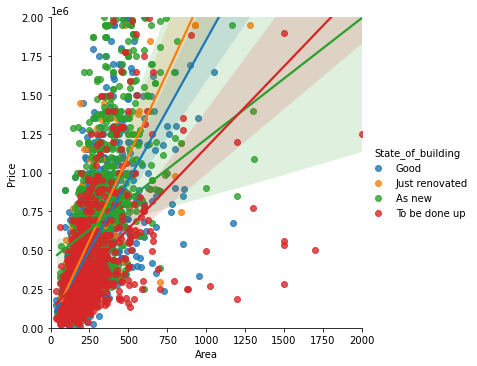

In [110]:
plt.figure(figsize=(12,6))
sns.lmplot(x = 'Area', y='Price', data=df, hue='State_of_building')
plt.xlim(0, 2000)
plt.ylim(0, 2000000)

<AxesSubplot:xlabel='State_of_building', ylabel='Price'>

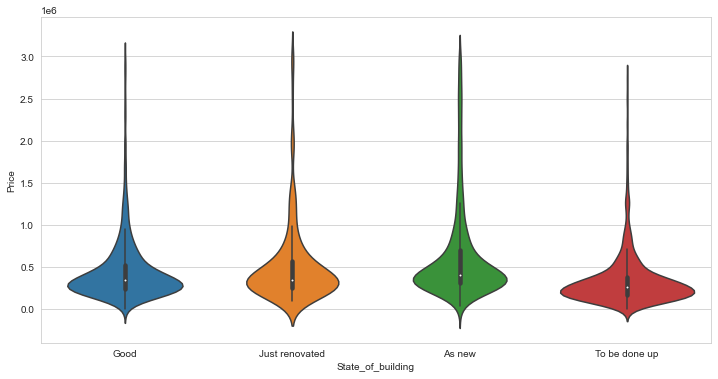

In [111]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Set theme
sns.set_style('whitegrid')
# Violin plot
sns.violinplot(x='State_of_building', y='Price', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'house'),
  Text(1, 0, 'villa'),
  Text(2, 0, 'mixed'),
  Text(3, 0, 'town'),
  Text(4, 0, 'chalet'),
  Text(5, 0, 'country'),
  Text(6, 0, 'apartment'),
  Text(7, 0, 'mansion'),
  Text(8, 0, 'exceptiona'),
  Text(9, 0, 'bungalow'),
  Text(10, 0, 'manor'),
  Text(11, 0, 'farmhouse'),
  Text(12, 0, 'castle'),
  Text(13, 0, 'other')])

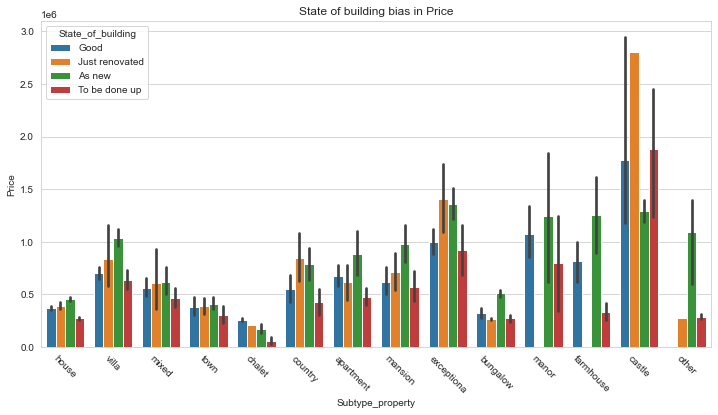

In [112]:
plt.figure(figsize=(12,6))

sns.barplot(x='Subtype_property', y='Price', data=df, hue='State_of_building')
plt.title('State of building bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1, 2]),
 [Text(0, 0, 'Flanders'), Text(1, 0, 'Wallonia'), Text(2, 0, 'Brussels')])

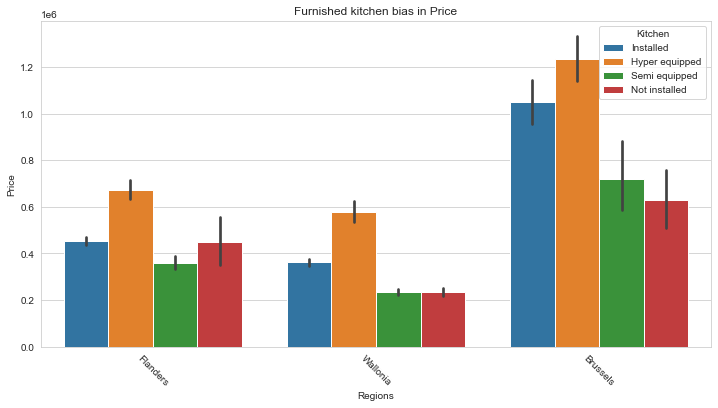

In [113]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Regions', y='Price', data=df, hue='Kitchen')
plt.title('Furnished kitchen bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'house'),
  Text(1, 0, 'villa'),
  Text(2, 0, 'mixed'),
  Text(3, 0, 'town'),
  Text(4, 0, 'chalet'),
  Text(5, 0, 'country'),
  Text(6, 0, 'apartment'),
  Text(7, 0, 'mansion'),
  Text(8, 0, 'exceptiona'),
  Text(9, 0, 'bungalow'),
  Text(10, 0, 'manor'),
  Text(11, 0, 'farmhouse'),
  Text(12, 0, 'castle'),
  Text(13, 0, 'other')])

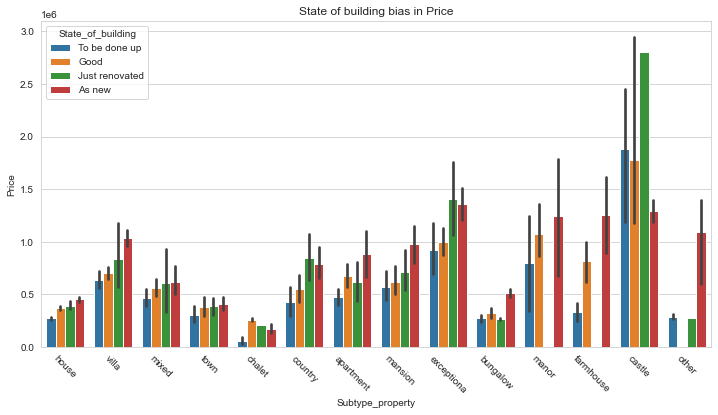

In [114]:
plt.figure(figsize=(12,6))

sns.barplot(x='Subtype_property', y='Price', data=df, hue='State_of_building', 
            hue_order=["To be done up", "Good", "Just renovated", "As new"])
plt.title('State of building bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'house'),
  Text(1, 0, 'villa'),
  Text(2, 0, 'mixed'),
  Text(3, 0, 'town'),
  Text(4, 0, 'chalet'),
  Text(5, 0, 'country'),
  Text(6, 0, 'apartment'),
  Text(7, 0, 'mansion'),
  Text(8, 0, 'exceptiona'),
  Text(9, 0, 'bungalow'),
  Text(10, 0, 'manor'),
  Text(11, 0, 'farmhouse'),
  Text(12, 0, 'castle'),
  Text(13, 0, 'other')])

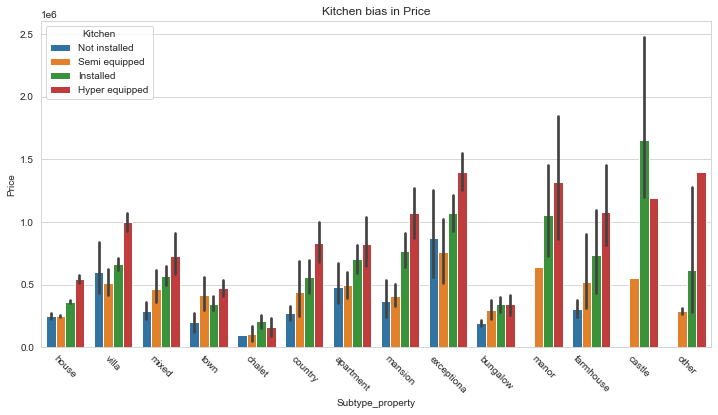

In [115]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Subtype_property', y='Price', data=df, hue='Kitchen', 
            hue_order=['Not installed', 'Semi equipped', 'Installed','Hyper equipped'])
plt.title('Kitchen bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'house'),
  Text(1, 0, 'villa'),
  Text(2, 0, 'mixed'),
  Text(3, 0, 'town'),
  Text(4, 0, 'chalet'),
  Text(5, 0, 'country'),
  Text(6, 0, 'apartment'),
  Text(7, 0, 'mansion'),
  Text(8, 0, 'exceptiona'),
  Text(9, 0, 'bungalow'),
  Text(10, 0, 'manor'),
  Text(11, 0, 'farmhouse'),
  Text(12, 0, 'castle'),
  Text(13, 0, 'other')])

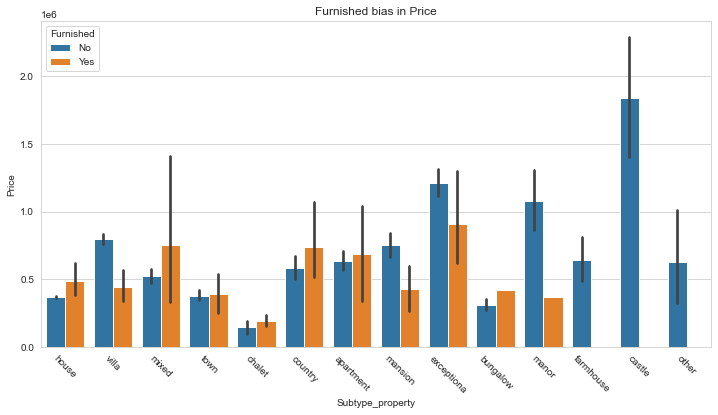

In [116]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Subtype_property', y='Price', data=df, hue='Furnished')
plt.title('Furnished bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'house'),
  Text(1, 0, 'villa'),
  Text(2, 0, 'mixed'),
  Text(3, 0, 'town'),
  Text(4, 0, 'chalet'),
  Text(5, 0, 'country'),
  Text(6, 0, 'apartment'),
  Text(7, 0, 'mansion'),
  Text(8, 0, 'exceptiona'),
  Text(9, 0, 'bungalow'),
  Text(10, 0, 'manor'),
  Text(11, 0, 'farmhouse'),
  Text(12, 0, 'castle'),
  Text(13, 0, 'other')])

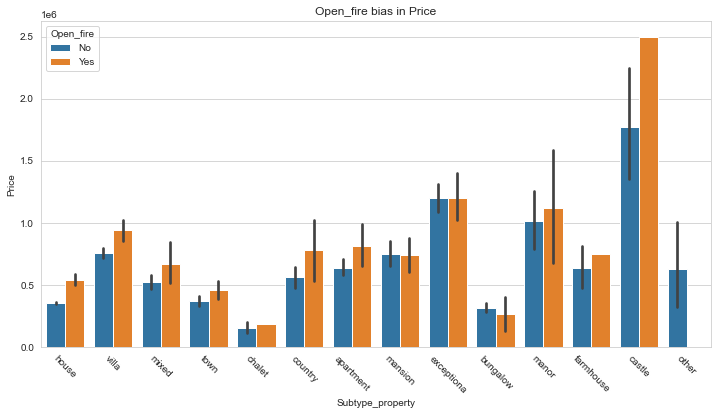

In [117]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Subtype_property', y='Price', data=df, hue='Open_fire')
plt.title('Open_fire bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'house'),
  Text(1, 0, 'villa'),
  Text(2, 0, 'mixed'),
  Text(3, 0, 'town'),
  Text(4, 0, 'chalet'),
  Text(5, 0, 'country'),
  Text(6, 0, 'apartment'),
  Text(7, 0, 'mansion'),
  Text(8, 0, 'exceptiona'),
  Text(9, 0, 'bungalow'),
  Text(10, 0, 'manor'),
  Text(11, 0, 'farmhouse'),
  Text(12, 0, 'castle'),
  Text(13, 0, 'other')])

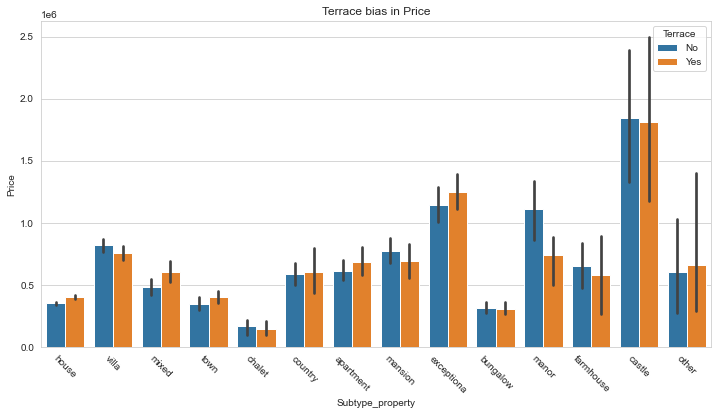

In [118]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Subtype_property', y='Price', data=df, hue='Terrace')
plt.title('Terrace bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'house'),
  Text(1, 0, 'villa'),
  Text(2, 0, 'mixed'),
  Text(3, 0, 'town'),
  Text(4, 0, 'chalet'),
  Text(5, 0, 'country'),
  Text(6, 0, 'apartment'),
  Text(7, 0, 'mansion'),
  Text(8, 0, 'exceptiona'),
  Text(9, 0, 'bungalow'),
  Text(10, 0, 'manor'),
  Text(11, 0, 'farmhouse'),
  Text(12, 0, 'castle'),
  Text(13, 0, 'other')])

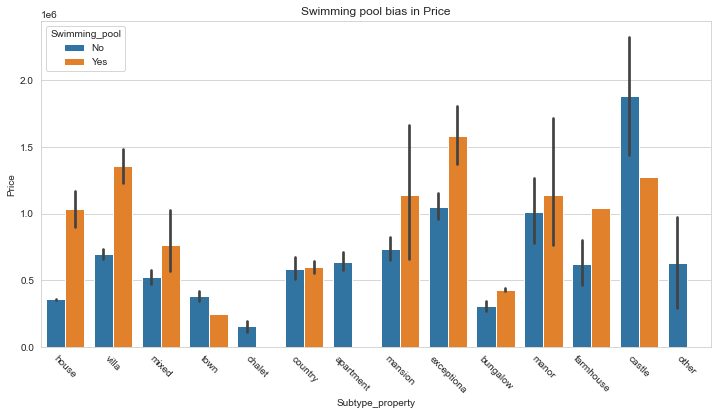

In [119]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Subtype_property', y='Price', data=df, hue='Swimming_pool')
plt.title('Swimming pool bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'house'),
  Text(1, 0, 'villa'),
  Text(2, 0, 'mixed'),
  Text(3, 0, 'town'),
  Text(4, 0, 'chalet'),
  Text(5, 0, 'country'),
  Text(6, 0, 'apartment'),
  Text(7, 0, 'mansion'),
  Text(8, 0, 'exceptiona'),
  Text(9, 0, 'bungalow'),
  Text(10, 0, 'manor'),
  Text(11, 0, 'farmhouse'),
  Text(12, 0, 'castle'),
  Text(13, 0, 'other')])

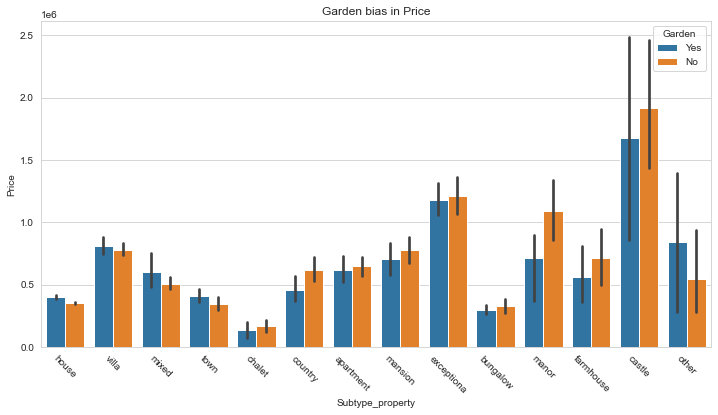

In [120]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Subtype_property', y='Price', data=df, hue='Garden')
plt.title('Garden bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Good'),
  Text(1, 0, 'Just renovated'),
  Text(2, 0, 'As new'),
  Text(3, 0, 'To be done up')])

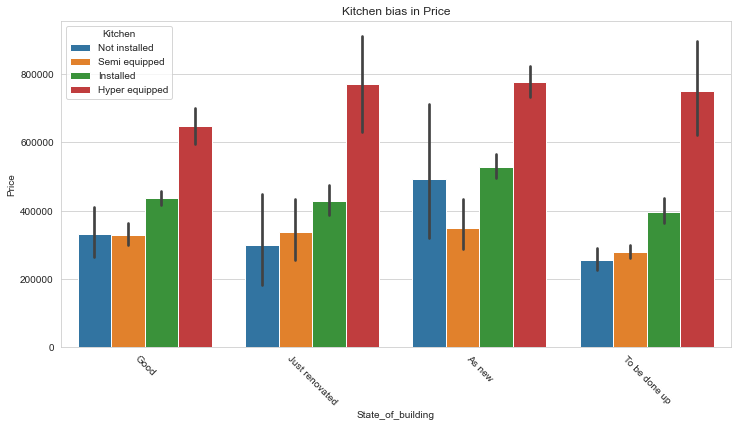

In [121]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='State_of_building', y='Price', data=df, hue='Kitchen',
           hue_order=['Not installed', 'Semi equipped', 'Installed','Hyper equipped'])
plt.title('Kitchen bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Good'),
  Text(1, 0, 'Just renovated'),
  Text(2, 0, 'As new'),
  Text(3, 0, 'To be done up')])

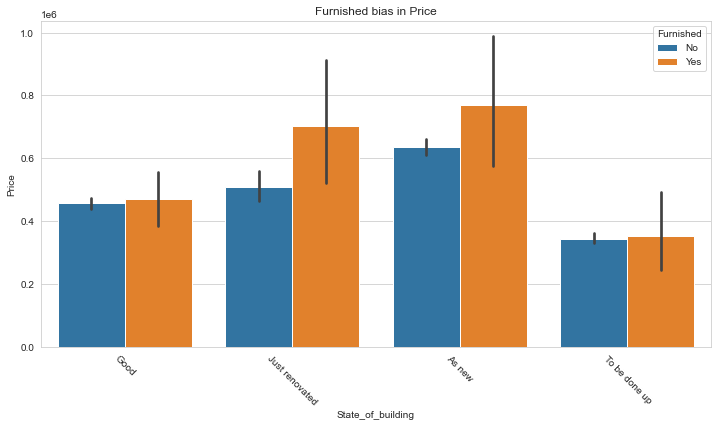

In [122]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='State_of_building', y='Price', data=df, hue='Furnished')
plt.title('Furnished bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Good'),
  Text(1, 0, 'Just renovated'),
  Text(2, 0, 'As new'),
  Text(3, 0, 'To be done up')])

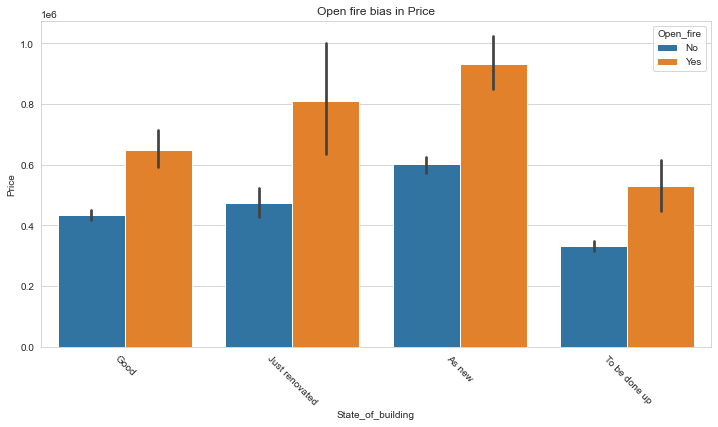

In [123]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='State_of_building', y='Price', data=df, hue='Open_fire')
plt.title('Open fire bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

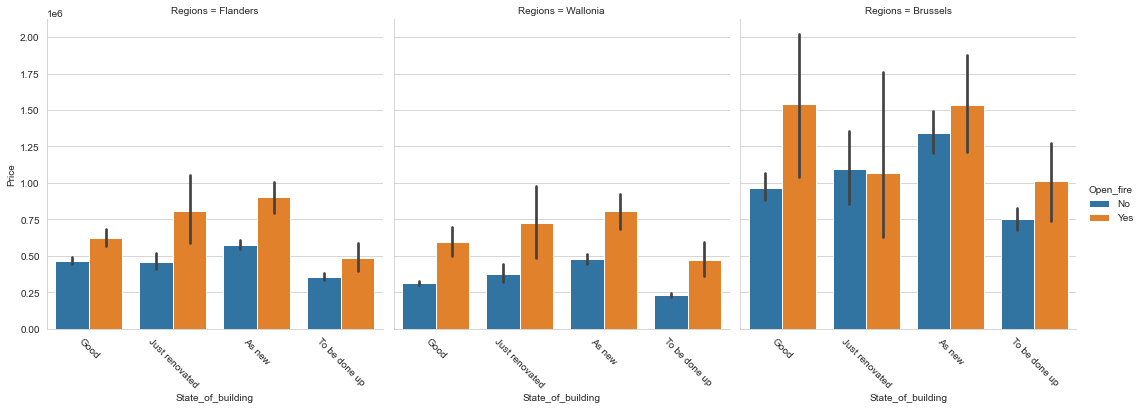

In [124]:
# Factor Plot
g = sns.catplot(x='State_of_building', 
                   y='Price', 
                   data=df, 
                   hue='Open_fire',  # Color by Open fire
                   col='Regions',  # Separate by Region
                   kind='bar') # Bar plot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

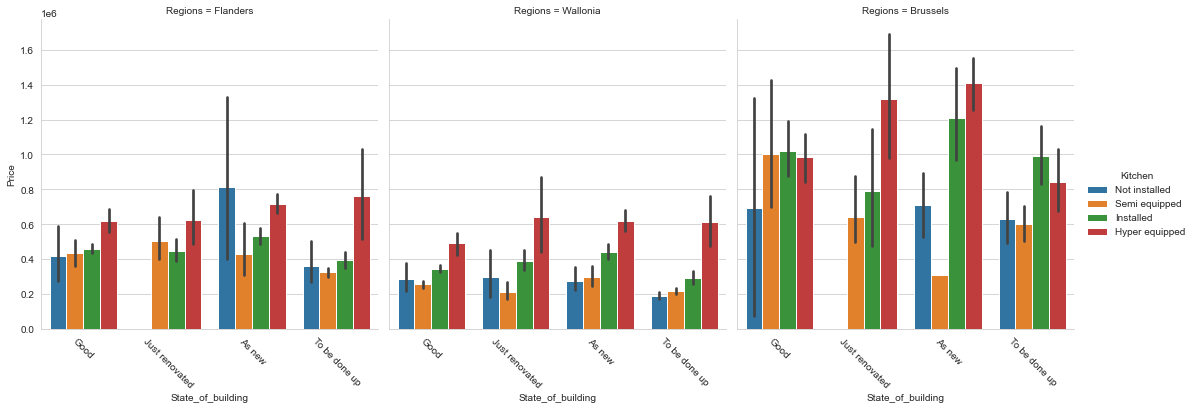

In [125]:
# Factor Plot
g = sns.catplot(x='State_of_building', 
                   y='Price', 
                   data=df, 
                   hue='Kitchen', # Color by Kitchen
                   hue_order=['Not installed', 'Semi equipped', 'Installed','Hyper equipped'], 
                   col='Regions',  # Separate by Region
                   kind='bar') # Bar plot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

In [127]:
zips_full = pd.read_csv("Belgium_zip_municipalities.txt", sep="\t")
print(zips_full)
zips = zips_full.iloc[:,1:3]
zips.columns = ["Zip_code", "city"]
pd.options.display.float_format = '{:.0f}'.format
print(df.shape)
print(df.columns)
print(zips_full.columns)

     country_code  Zip_code         place_name         admin_name1  \
0              BE      1000          Bruxelles  Bruxelles-Capitale   
1              BE      1020             Laeken  Bruxelles-Capitale   
2              BE      1030         Schaerbeek  Bruxelles-Capitale   
3              BE      1040          Etterbeek  Bruxelles-Capitale   
4              BE      1050            Ixelles  Bruxelles-Capitale   
...           ...       ...                ...                 ...   
2775           BE      5680           Niverlée            Wallonie   
2776           BE      5680            Romerée            Wallonie   
2777           BE      5680  Matagne-La-Petite            Wallonie   
2778           BE      5680  Matagne-La-Grande            Wallonie   
2779           BE      5680          Vaucelles            Wallonie   

     admin_code1  admin_name2 admin_code2 admin_name3  \
0            BRU  Bruxelles (19 communes)         BRU   
1            BRU  Bruxelles (19 communes)    

In [128]:
# Dropping outlier
df.drop(df[df["Zip_code"] == 1404].index,inplace=True)

In [129]:
# Grouping into municipalities.
def rounding_down(x):
    rest = x % 10
    if rest != 0:
        return x - rest
    else:
        return x

df["municipalities"] = df["Zip_code"].apply(lambda x: rounding_down(x))
df["municipalities"]

0        3290
3        2070
4        8800
5        8000
6        8800
         ... 
11376    4280
11377    4040
11379    7390
11380    4470
11381    9290
Name: municipalities, Length: 7801, dtype: int64

In [130]:
# Dropping if only 5 valid price rows
threshold = 5
value_counts = df.municipalities.value_counts()
to_remove = list(value_counts[value_counts <= threshold].index)
df_threshold = df.copy()

for label, row in df_threshold.iterrows():
    if row.municipalities in to_remove:
        df_threshold.drop(index=label, inplace=True)

print(df.shape)

(7801, 20)


In [131]:
# Function top 5
def make_top_5(df, postal_column:str, on_what:str, method:str, top_or_bottom:str) -> str:
    number_of_values = 5
    if top_or_bottom == "top":
        dct = dict()
        postal_on_what = df.groupby(postal_column).agg({on_what:method})
        postal_on_what = postal_on_what.sort_values(on_what, ascending=False)[:number_of_values]
        postal_on_what.reset_index(level=0, inplace=True)
        df_with_cities = postal_on_what.merge(zips, right_on="Zip_code", left_on="municipalities", how="left")
        """print(df_with_cities)"""
        df_with_cities = df_with_cities.drop_duplicates("Zip_code", keep="first")
        df_with_cities = df_with_cities.drop("municipalities", axis=1)
        if on_what == "Price_per_square_meter":
            df_with_cities = df_with_cities[["Zip_code", "city", on_what]]
            df_with_cities.columns = ["Zip_code", "municipality", on_what]
        else:
            df_with_cities = df_with_cities[["Zip_code", "city", on_what]]
            df_with_cities.columns = ["Zip_code", "municipality", f"{on_what}_{method}"]
        df_with_cities.index = [x for x in range(1,number_of_values+1)]
        return df_with_cities
    elif top_or_bottom == "bottom":
        dct = dict()
        postal_on_what = df.groupby(postal_column).agg({on_what:method})
        postal_on_what = postal_on_what.sort_values(on_what, ascending=True)[:number_of_values]
        postal_on_what.reset_index(level=0, inplace=True)
        df_with_cities = postal_on_what.merge(zips, right_on="Zip_code", left_on="municipalities", how="left")
        """print(df_with_cities)"""
        df_with_cities = df_with_cities.drop_duplicates("Zip_code", keep="first")
        df_with_cities = df_with_cities.drop("municipalities", axis=1)
        if on_what == "Price_per_square_meter":
            df_with_cities = df_with_cities[["Zip_code", "city", on_what]]
            df_with_cities.columns = ["Zip_code", "municipality", on_what]
        else:
            df_with_cities = df_with_cities[["Zip_code", "city", on_what]]
            df_with_cities.columns = ["Zip_code", "municipality", f"{on_what}_{method}"]
        df_with_cities.index = [x for x in range(1,number_of_values+1)]
        return df_with_cities
    else:
        raise ValueError("""
Unexpected argument.
Expected 'top' or 'bottom'""")

In [132]:
# Most expensive mean - By price - Belgium

top5_price_Belgium_mean = make_top_5(df_threshold, "municipalities", "Price", "mean", "top")
top5_price_Belgium_mean

,Zip_code,municipality,Price_mean
1,1640,Rhode-Saint-Genèse,1682692
2,1180,Uccle,1537943
3,8300,Knokke-Heist,1373209
4,1950,Kraainem,1276667
5,1050,Ixelles,1238990


In [133]:
# Most expensive median - By price - Belgium
top5_price_Belgium_median = make_top_5(df_threshold, "municipalities", "Price", "median", "top")
top5_price_Belgium_median

,Zip_code,municipality,Price_median
1,1640,Rhode-Saint-Genèse,1745000
2,1180,Uccle,1492500
3,8300,Knokke-Heist,1190000
4,1050,Ixelles,1070000
5,2000,Antwerpen,995000


In [134]:
# Most expensive mean - By € / SQM - Belgium
top5_sqm_Belgium_mean = make_top_5(df_threshold, "municipalities", "Price_per_square_meter", "mean", "top")
top5_sqm_Belgium_mean

,Zip_code,municipality,Price_per_square_meter
1,8300,Knokke-Heist,5458
2,1180,Uccle,4131
3,1640,Rhode-Saint-Genèse,3883
4,1150,Woluwe-Saint-Pierre,3848
5,1970,Wezembeek-Oppem,3785


In [135]:
# Only Flanders DataFrame
df_threshold_Flanders = df_threshold[df_threshold["Regions"] == "Flanders"]


In [136]:
# Most expensive mean - By price - Flanders
top5_price_Flanders_mean = make_top_5(df_threshold_Flanders, "municipalities", "Price", "mean", "top")
top5_price_Flanders_mean

,Zip_code,municipality,Price_mean
1,1640,Rhode-Saint-Genèse,1682692
2,8300,Knokke-Heist,1373209
3,1950,Kraainem,1276667
4,3080,Tervuren,1149362
5,2970,'S Gravenwezel,1111000


In [137]:
# Most expensive median - By price - Flanders
top5_price_Flanders_median = make_top_5(df_threshold_Flanders, "municipalities", "Price", "median", "top")
top5_price_Flanders_median

,Zip_code,municipality,Price_median
1,1640,Rhode-Saint-Genèse,1745000
2,8300,Knokke-Heist,1190000
3,2000,Antwerpen,995000
4,3140,Keerbergen,935000
5,1560,Hoeilaart,920000


In [138]:
# Most expensive mean - By € / SQM - Flanders
top5_sqm_Flanders_mean = make_top_5(df_threshold_Flanders, "municipalities", "Price_per_square_meter", "mean", "top")
top5_sqm_Flanders_mean

,Zip_code,municipality,Price_per_square_meter
1,8300,Knokke-Heist,5458
2,1640,Rhode-Saint-Genèse,3883
3,1970,Wezembeek-Oppem,3785
4,3000,Leuven,3557
5,1950,Kraainem,3439


In [139]:
# Only Wallonia DataFrame
df_threshold_Wallonia = df_threshold[df_threshold["Regions"] == "Wallonia"]


In [140]:
# Most expensive mean - By price - Wallonia
top5_price_Wallonia_mean = make_top_5(df_threshold_Wallonia, "municipalities", "Price", "mean", "top")
top5_price_Wallonia_mean

,Zip_code,municipality,Price_mean
1,1380,Lasne,1040419
2,1410,Waterloo,994451
3,7520,Templeuve,792500
4,1310,La Hulpe,759292
5,6280,Gerpinnes,743875


In [141]:
# Most expensive median - By price - Wallonia
top5_price_Wallonia_median = make_top_5(df_threshold_Wallonia, "municipalities", "Price", "median", "top")
top5_price_Wallonia_median

,Zip_code,municipality,Price_median
1,1380,Lasne,895000
2,7520,Templeuve,842500
3,1410,Waterloo,820000
4,1370,Jodoigne,589500
5,1330,Rixensart,580000


In [142]:

# Most expensive mean - By € / SQM - Wallonia
top5_sqm_Wallonia_mean = make_top_5(df_threshold_Wallonia, "municipalities", "Price_per_square_meter", "mean", "top")
top5_sqm_Wallonia_mean


,Zip_code,municipality,Price_per_square_meter
1,1380,Lasne,3170
2,1410,Waterloo,3053
3,1330,Rixensart,2951
4,1440,Braine-Le-Château,2665
5,1340,Ottignies-Louvain-La-Neuve,2650


In [54]:
# Least expensive mean - By price - Belgium
low5_price_Belgium_mean = make_top_5(df_threshold, "municipalities", "Price", "mean", "bottom")
low5_price_Belgium_mean

,Zip_code,municipality,Price_mean
1,6020,Dampremy,129800
2,7340,Colfontaine,130429
3,7390,Quaregnon,138768
4,6200,Châtelineau,149582
5,6870,Saint-Hubert,152250


In [143]:
# Least expensive median - By price - Belgium
low5_price_Belgium_median = make_top_5(df_threshold, "municipalities", "Price", "median", "bottom")
low5_price_Belgium_median

,Zip_code,municipality,Price_median
1,6020,Dampremy,109950
2,7340,Colfontaine,110000
3,6870,Saint-Hubert,122500
4,7390,Quaregnon,124500
5,7370,Dour,141250


In [144]:
# Least expensive mean - By € / SQM - Belgium
low5_sqm_Belgium_mean = make_top_5(df_threshold, "municipalities", "Price_per_square_meter", "mean", "bottom")
low5_sqm_Belgium_mean

,Zip_code,municipality,Price_per_square_meter
1,6020,Dampremy,733
2,6870,Saint-Hubert,802
3,6590,Momignies,868
4,7370,Dour,872
5,6690,Vielsalm,877


In [145]:
# Least expensive mean - By price - Flanders
low5_price_Flanders_mean = make_top_5(df_threshold_Flanders, "municipalities", "Price", "mean", "bottom")
low5_price_Flanders_mean

,Zip_code,municipality,Price_mean
1,8950,Heuvelland,224167
2,3640,Kinrooi,238889
3,8520,Kuurne,246125
4,8650,Houthulst,249896
5,8920,Langemark,259488


In [146]:
# Least expensive median - By price - Flanders
low5_price_Flanders_median = make_top_5(df_threshold_Flanders, "municipalities", "Price", "median", "bottom")
low5_price_Flanders_median

,Zip_code,municipality,Price_median
1,8950,Heuvelland,224500
2,8650,Houthulst,232000
3,2660,Hoboken,239000
4,8580,Avelgem,239500
5,3640,Kinrooi,241000


In [147]:
# Least expensive mean - By € / SQM - Flanders
low5_sqm_Flanders_mean = make_top_5(df_threshold_Flanders, "municipalities", "Price_per_square_meter", "mean", "bottom")
low5_sqm_Flanders_mean

,Zip_code,municipality,Price_per_square_meter
1,8880,Ledegem,1304
2,8920,Langemark,1319
3,3640,Kinrooi,1366
4,8650,Houthulst,1422
5,8580,Avelgem,1454


In [148]:
# Least expensive mean - By price - Wallonia
low5_price_Wallonia_mean = make_top_5(df_threshold_Wallonia, "municipalities", "Price", "mean", "bottom")
low5_price_Wallonia_mean

,Zip_code,municipality,Price_mean
1,6020,Dampremy,129800
2,7340,Colfontaine,130429
3,7390,Quaregnon,138768
4,6200,Châtelineau,149582
5,6870,Saint-Hubert,152250


In [149]:
# Least expensive median - By price - Wallonia
low5_price_Wallonia_median = make_top_5(df_threshold_Wallonia, "municipalities", "Price", "median", "bottom")
low5_price_Wallonia_median

,Zip_code,municipality,Price_median
1,6020,Dampremy,109950
2,7340,Colfontaine,110000
3,6870,Saint-Hubert,122500
4,7390,Quaregnon,124500
5,7370,Dour,141250


In [150]:
# Least expensive mean - By € / SQM - Wallonia
low5_sqm_Wallonia_mean = make_top_5(df_threshold_Wallonia, "municipalities", "Price_per_square_meter", "mean", "bottom")
low5_sqm_Wallonia_mean

,Zip_code,municipality,Price_per_square_meter
1,6020,Dampremy,733
2,6870,Saint-Hubert,802
3,6590,Momignies,868
4,7370,Dour,872
5,6690,Vielsalm,877


In [151]:
# Clean zips dataframe
zips_full = zips_full.drop(axis=1, columns=["country_code", "admin_name1","admin_code1",'admin_name2 admin_code2','admin_name3', 'admin_code3', 'admin_code3.1', "accuracy"])
print(zips_full.columns)

Index(['Zip_code', 'place_name', 'lat', 'long'], dtype='object')


In [152]:
# Merge zips with house_df
one_df = df_threshold.merge(zips_full.drop_duplicates("Zip_code"), left_on="municipalities", right_on= "Zip_code", how="left")

In [153]:
# Plot mean price on map of Belgium
one_df_grouped = one_df.groupby("municipalities").agg({"Price": "mean"})
one_df_grouped.reset_index(level=0, inplace=True)
one_df_grouped_mean = one_df_grouped.merge(zips_full, how="left", right_on="Zip_code", left_on="municipalities")
one_df_grouped_mean = one_df_grouped_mean.sort_values("Price")
one_df_grouped_mean_10 = one_df_grouped_mean.iloc[[0,1,2,3,4,5,6,7,8,9,-9,-8,-7,-6,-5,-4,-3,-2,-1]]


fig = px.scatter_mapbox(one_df_grouped_mean, lat="lat", lon="long", hover_name="place_name",
                        zoom=6, color="Price",center={"lat":50.6, "lon":5.1},
                        color_continuous_scale="magenta",range_color=[0,1400000], size= "Price", size_max= 7 , opacity=0.9,
                        width=800, height=650)

fig.update_geos(fitbounds="locations")
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":10,"l":0,"b":0}, geo=dict(projection_scale=4))
fig.update_layout(showlegend = True)
fig.show()

NameError: name 'px' is not defined

In [155]:
# # Plot median price on map of Belgium
one_df_grouped_median = one_df.groupby("municipalities").agg({"Price": "median"})
one_df_grouped_median.reset_index(level=0, inplace=True)
one_df_grouped_median = one_df_grouped_median.merge(zips_full, how="left", right_on="Zip_code", left_on="municipalities")
one_df_grouped_median = one_df_grouped_median.sort_values("Price")
one_df_grouped_median_10 = one_df_grouped_median.iloc[[0,1,2,3,4,5,6,7,8,9,-9,-8,-7,-6,-5,-4,-3,-2,-1]]

fig = px.scatter_mapbox(one_df_grouped_median, lat="lat", lon="long", hover_name="place_name", hover_data=["Zip_code"],
                        zoom=6, width=900, height=700, color="Price",center={"lat":50.6, "lon":5.1},
                        color_continuous_scale="magenta",range_color=[0,1200000], size= "Price", size_max= 7, opacity=0.9)

fig.update_geos(fitbounds="locations")
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":10,"t":0,"l":0,"b":0}, geo=dict(projection_scale=4))
fig.update_layout(showlegend = True)
fig.show()

NameError: name 'px' is not defined

In [156]:
# Plot mean price per square_meter on map of Belgium
one_df_grouped_sqm = one_df.groupby("municipalities").agg({"Price_per_square_meter": "mean"})
one_df_grouped_sqm.reset_index(level=0, inplace=True)
one_df_grouped_sqm = one_df_grouped_sqm.merge(zips_full, how="left", right_on="Zip_code", left_on="municipalities")
one_df_grouped_sqm = one_df_grouped_sqm.sort_values("Price_per_square_meter")
one_df_grouped_sqm_10 = one_df_grouped_sqm.iloc[[0,1,2,3,4,5,6,7,8,9,-9,-8,-7,-6,-5,-4,-3,-2,-1]]

one_df_grouped_sqm.rename(columns={"Price_per_square_meter":"€ / SQM"}, inplace=True)
fig = px.scatter_mapbox(one_df_grouped_sqm, lat="lat", lon="long", hover_name="place_name", hover_data=["Zip_code"],
                        zoom=6, width=900, height=600, color="€ / SQM",center={"lat":50.6, "lon":5.1},
                        color_continuous_scale="magenta",range_color=[0,4000], size= "€ / SQM", size_max= 9, opacity=0.9)

fig.update_geos(fitbounds="locations")
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":10,"t":0,"l":0,"b":0}, geo=dict(projection_scale=4))
fig.update_layout(showlegend = True)
fig.show()

NameError: name 'px' is not defined